In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1 & 2 - Downloading and Loading the Dataset

In [2]:
data = pd.read_csv("abalone.csv")

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.shape

(4177, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [7]:
Age=1.5+data.Rings
data["Age"]=Age
data=data.rename(columns = {'Whole weight':'Whole_weight','Shucked weight': 'Shucked_weight','Viscera weight': 'Viscera_weight',
                            'Shell weight': 'Shell_weight'})
data=data.drop(columns=["Rings"],axis=1)
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## Task 3 - Visualizations

### 3.1 - Univariate Analysis

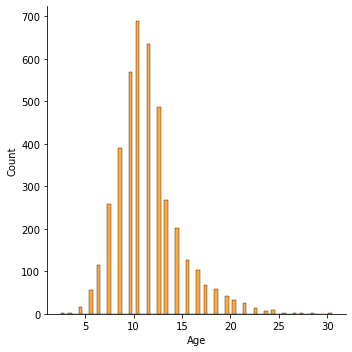

In [8]:
sns.displot(data["Age"], color='darkorange')

<AxesSubplot:xlabel='Age', ylabel='Count'>

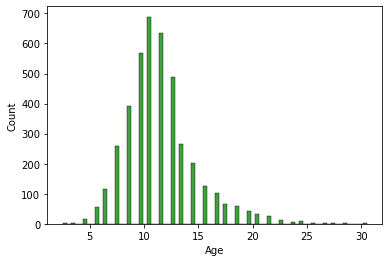

In [9]:
sns.histplot(x=data.Age,color='green') 

<AxesSubplot:>

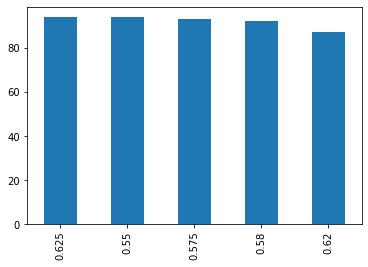

In [10]:
data['Length'].value_counts().head().plot.bar()

### 3.2 - Bi-Variate Analysis

<AxesSubplot:xlabel='Age', ylabel='Height'>

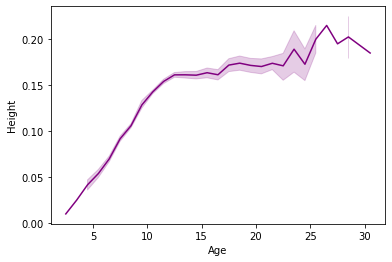

In [12]:
sns.lineplot(x=data.Age,y=data.Height, color='purple')

In [13]:
plt.scatter(data.Sex,data.Rings)

AttributeError: 'DataFrame' object has no attribute 'Rings'

In [ ]:
data[data['Rings']<30].sample(100).plot.scatter(x='Rings', y='Sex')

### 3.3 - Multi-Variate Analysis

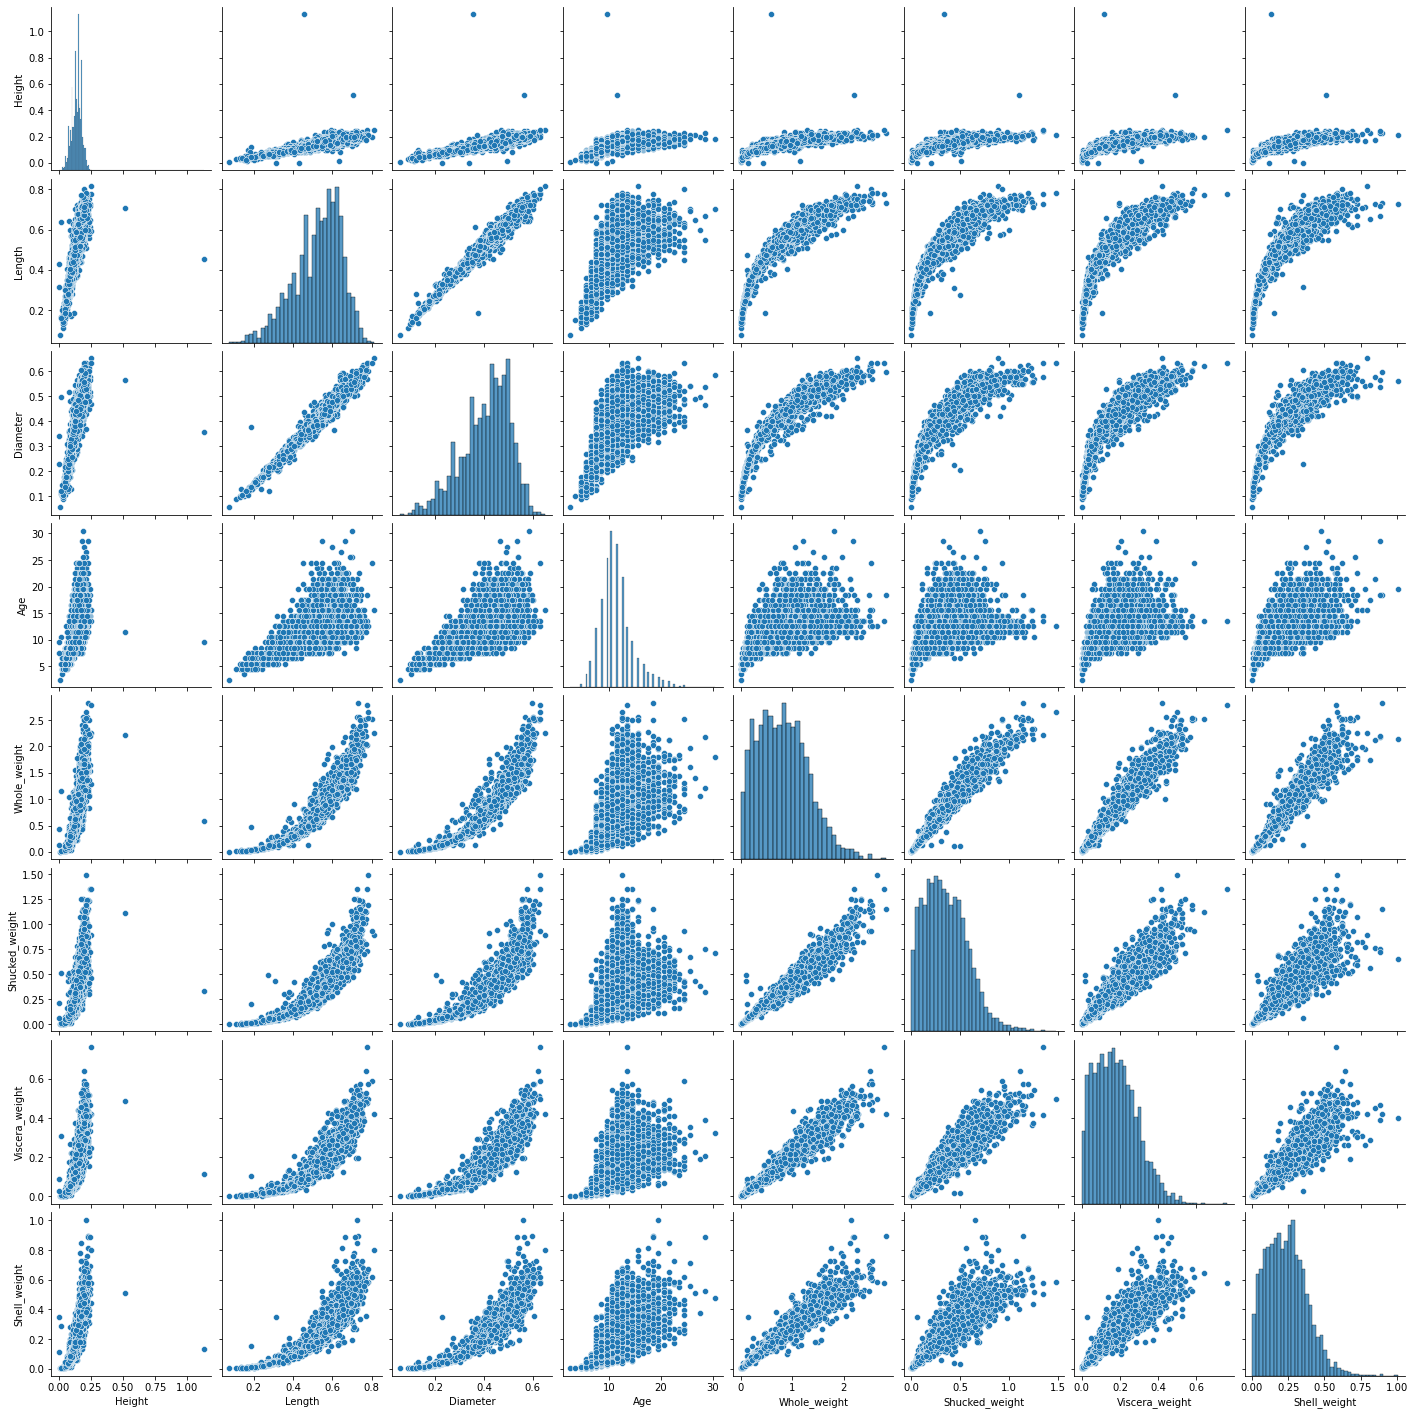

In [14]:
sns.pairplot(data=data[["Height","Length","Diameter","Age","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight"]])

<AxesSubplot:>

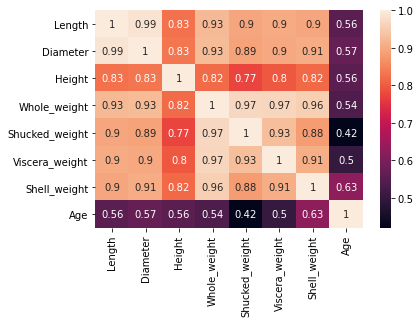

In [15]:
sns.heatmap(data.corr(),annot=True)

## Task 4 - Descriptive Statistics

In [16]:
data.describe(include='all')

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000


## Task 5 - Handle the Missing values

In [17]:
data.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole_weight      False
Shucked_weight    False
Viscera_weight    False
Shell_weight      False
Age               False
dtype: bool

In [18]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Age               0
dtype: int64

## Task 6 - Find Outliers and Replacing

In [19]:
data.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole_weight      0.530959
Shucked_weight    0.719098
Viscera_weight    0.591852
Shell_weight      0.620927
Age               1.114102
dtype: float64

In [20]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Height'>

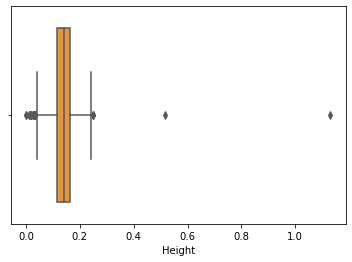

In [21]:
sns.boxplot("Height", data=data, palette="YlOrBr")

<AxesSubplot:xlabel='Length'>

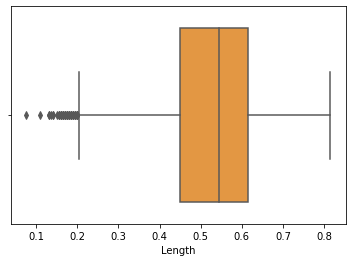

In [23]:
sns.boxplot("Length",data=data,palette="YlOrBr")

<AxesSubplot:xlabel='Diameter'>

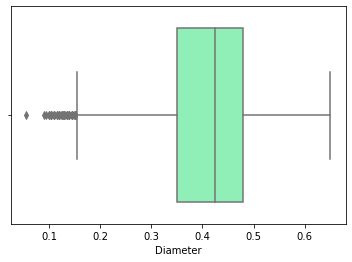

In [24]:
sns.boxplot("Diameter",data=data,palette="rainbow")

In [25]:
outliers=data.quantile(q=(0.25,0.75))
outliers

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,9.5
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,12.5


In [26]:
a = data.Age.quantile(0.25)
b = data.Age.quantile(0.75)
c = b - a
lower_limit = a - 1.5 * c
data.median(numeric_only=True)

Length             0.5450
Diameter           0.4250
Height             0.1400
Whole_weight       0.7995
Shucked_weight     0.3360
Viscera_weight     0.1710
Shell_weight       0.2340
Age               10.5000
dtype: float64

<AxesSubplot:xlabel='Age'>

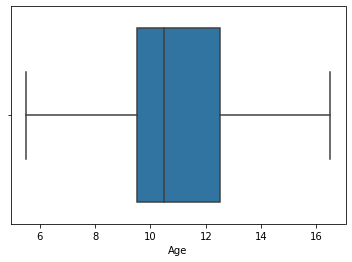

In [27]:
data['Age'] = np.where(data['Age'] < lower_limit, 7, data['Age'])
sns.boxplot(x=data.Age,showfliers = False)

## Task 7 - Check for Categorical columns and perform encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def labelencoder(data):
    for i in data.columns:
        if(data[i].dtypes=="object"):
            data[i]=le.fit_transform(data[i])
    return data.dtypes
labelencoder(data)

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Age               float64
dtype: object

In [29]:
data.Sex = le.fit_transform(data.Sex)

data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## Task 8 - Split the data into dependent and independent variables

In [30]:
y = data["Sex"]
y.head()

0    2
1    2
2    0
3    2
4    1
Name: Sex, dtype: int64

In [31]:
x=data.drop(columns=["Sex"],axis=1)
x.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## Task 9 - Scale the independent variables

In [32]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.577830
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.919022
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.294809
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.017298
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.919022


## Task 10 - Split the data into training and testing

In [33]:
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy = train_test_split(x,y,test_size = 0.2, random_state=0)

In [34]:
print(trainx.shape, testx.shape, trainy.shape, testy.shape)

(3341, 8) (836, 8) (3341,) (836,)


In [35]:
trainx.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
3141,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,6.5
3521,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,7.0
883,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,16.5
3627,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,11.5
2106,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,15.5


In [36]:
trainy.head()

3141    1
3521    1
883     2
3627    2
2106    2
Name: Sex, dtype: int64

In [37]:
testx.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
668,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350,14.5
1580,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935,9.5
3784,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175,12.5
463,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200,6.5
2615,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775,13.5


testy.head()

## Task 11 - Build the Model

In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')
model.fit(trainx,trainy)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [39]:
y_predict = model.predict(testx)
y_predict_train = model.predict(trainx)

## Task 12 - Train the Model

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Training accuracy: ',accuracy_score(trainy,y_predict_train))

Training accuracy:  0.9823406165818617


## Task 13 - Test the Model

In [41]:
print('Testing accuracy: ',accuracy_score(testy,y_predict))

Testing accuracy:  0.5430622009569378


## Task 14 - Measure the performance using Metrics

In [42]:
pd.crosstab(testy,y_predict)

col_0,0,1,2
Sex,,,
0,120,32,97
1,39,214,38
2,121,55,120


In [43]:
print(classification_report(testy,y_predict))

              precision    recall  f1-score   support

           0       0.43      0.48      0.45       249
           1       0.71      0.74      0.72       291
           2       0.47      0.41      0.44       296

    accuracy                           0.54       836
   macro avg       0.54      0.54      0.54       836
weighted avg       0.54      0.54      0.54       836

